# ***TITANIC SURVIVAL PREDICTION***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.metrics import * 
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [113]:
df = pd.read_csv("https://raw.githubusercontent.com/rolandmueller/titanic/main/titanic3.csv")

In [114]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [115]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


## EDA

In [116]:
df.shape

(1309, 14)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [118]:
df.nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

In [119]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [120]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [121]:
'''

From the above output, we can derive the following insights:

- Total Entries: The dataset comprises 891 rows.

- Columns: There are 12 columns, with a combination of float, int, and object data types. 
           Converting object types to numerical representations may be necessary for certain analysis 
           and modeling tasks.
  
- Missing Values: Several columns, including 'Age', 'Cabin', and 'Embarked', contain missing values. 
                To address this, we may consider strategies such as imputation or removal of rows/columns
                with missing values to ensure the integrity of our analysis.



'''

"\n\nFrom the above output, we can derive the following insights:\n\n- Total Entries: The dataset comprises 891 rows.\n\n- Columns: There are 12 columns, with a combination of float, int, and object data types. \n           Converting object types to numerical representations may be necessary for certain analysis \n           and modeling tasks.\n  \n- Missing Values: Several columns, including 'Age', 'Cabin', and 'Embarked', contain missing values. \n                To address this, we may consider strategies such as imputation or removal of rows/columns\n                with missing values to ensure the integrity of our analysis.\n\n\n\n"

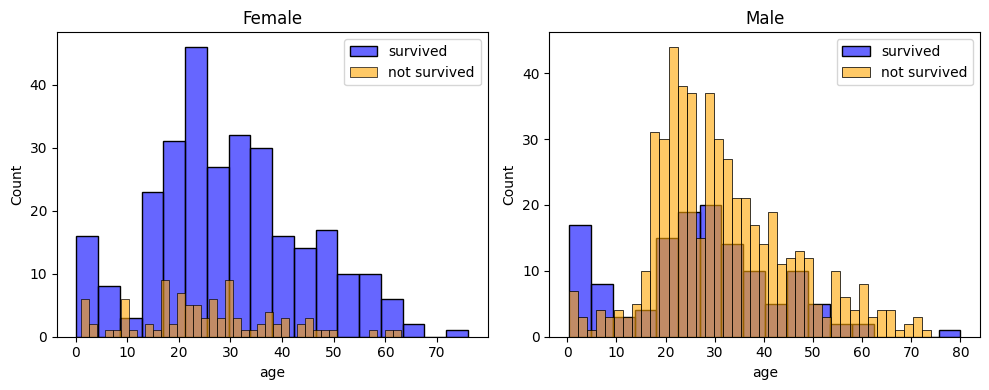

In [122]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

women = df[df['sex'] == 'female']  # Storing females in a var named as women
men = df[df['sex'] == 'male']      # Storing males in a var named as men

# For women
ax = sns.histplot(women[women['survived'] == 1].age.dropna(), bins=18, label=survived, ax=axes[0], kde=False, color='blue', alpha=0.6)
ax = sns.histplot(women[women['survived'] == 0].age.dropna(), bins=40, label=not_survived, ax=axes[0], kde=False, color='orange', alpha=0.6)
ax.legend()
ax.set_title('Female')

# For men
ax = sns.histplot(men[men['survived'] == 1].age.dropna(), bins=18, label=survived, ax=axes[1], kde=False, color='blue', alpha=0.6)
ax = sns.histplot(men[men['survived'] == 0].age.dropna(), bins=40, label=not_survived, ax=axes[1], kde=False, color='orange', alpha=0.6)
ax.legend()
ax.set_title('Male')

plt.tight_layout()
plt.show()


In [123]:
## Model Cleanings 

In [124]:
df.isnull().sum()[df.isnull().sum() > 0]

age           263
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

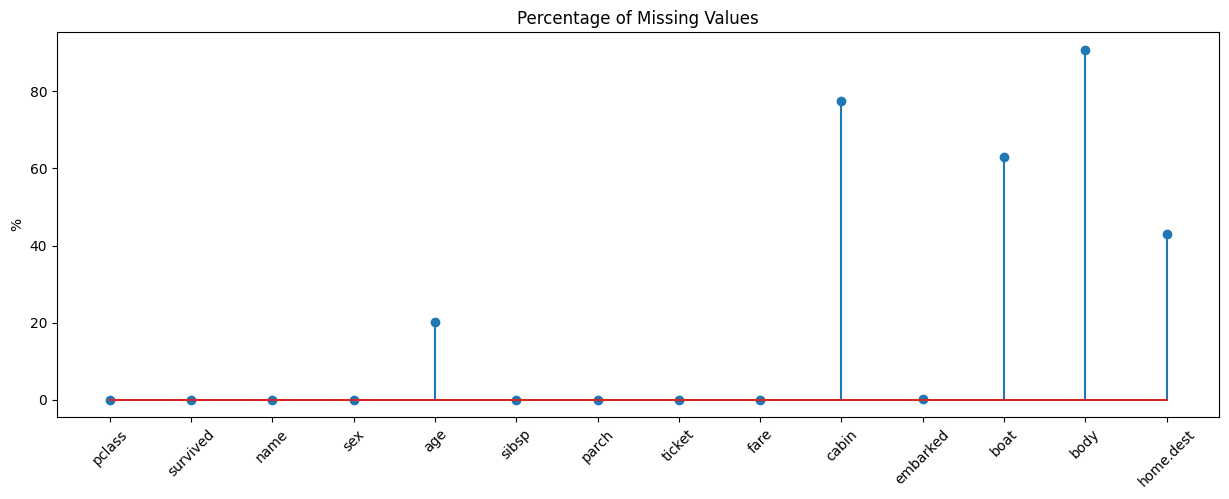

In [125]:
# Visualize the Null values

missing_values_per = pd.DataFrame((df.isnull().sum()/len(df))*100).reset_index()
plt.figure(figsize=(15,5))
plt.stem(missing_values_per['index'],missing_values_per[0])
plt.xticks(rotation=45,fontsize=10)
plt.title('Percentage of Missing Values')
plt.ylabel('%')
plt.show()

In [126]:
# Filling the nulls values


In [127]:
df.age.value_counts()

age
24.0000    47
22.0000    43
21.0000    41
30.0000    40
18.0000    39
           ..
0.3333      1
22.5000     1
70.5000     1
0.6667      1
26.5000     1
Name: count, Length: 98, dtype: int64

In [128]:
#Dropping  the “Cabin” column from the data frame as it won’t be of much importance
df = df.drop(columns='cabin', axis=1)

In [129]:
# Handling missing values in 'Age' by filling with the meam

# Handling missing values in 'Embarked' by filling with S

In [130]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [131]:
df.age.fillna(df.age.mean(),inplace=True)
df.fare.fillna(df.fare.mean(),inplace=True)
df.embarked.fillna("S",inplace=True)
df.boat.fillna(0,inplace=True)

In [132]:
# drop columns 
df.drop(columns={'body','home.dest','boat'},inplace=True)

In [133]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [134]:
df.select_dtypes(include='object').columns

Index(['name', 'sex', 'ticket', 'embarked'], dtype='object')

In [135]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [136]:
df.sex.replace({'male':0, 'female':1}, inplace=True)

In [137]:
df.embarked.replace({'S':0, 'C':1, 'Q':2}, inplace=True)

In [138]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'embarked'],
      dtype='object')

In [139]:
#There are few columns, which are not of much importance in this process. So let's get rid of them.

df = df.drop(columns = ['name','ticket'],axis=1)

In [140]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [141]:
df.corr()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
pclass,1.000000,-0.312469,-0.124617,-0.366370,0.060832,0.018322,-0.558477,0.038875
survived,-0.312469,1.000000,0.528693,-0.050199,-0.027825,0.082660,0.244208,0.098450
sex,-0.124617,0.528693,1.000000,-0.057398,0.109609,0.213125,0.185484,0.120423
age,-0.366370,-0.050199,-0.057398,1.000000,-0.190747,-0.130872,0.171521,0.035824
sibsp,0.060832,-0.027825,0.109609,-0.190747,1.000000,0.373587,0.160224,-0.073461
parch,0.018322,0.082660,0.213125,-0.130872,0.373587,1.000000,0.221522,-0.095523
fare,-0.558477,0.244208,0.185484,0.171521,0.160224,0.221522,1.000000,0.061118
embarked,0.038875,0.098450,0.120423,0.035824,-0.073461,-0.095523,0.061118,1.000000


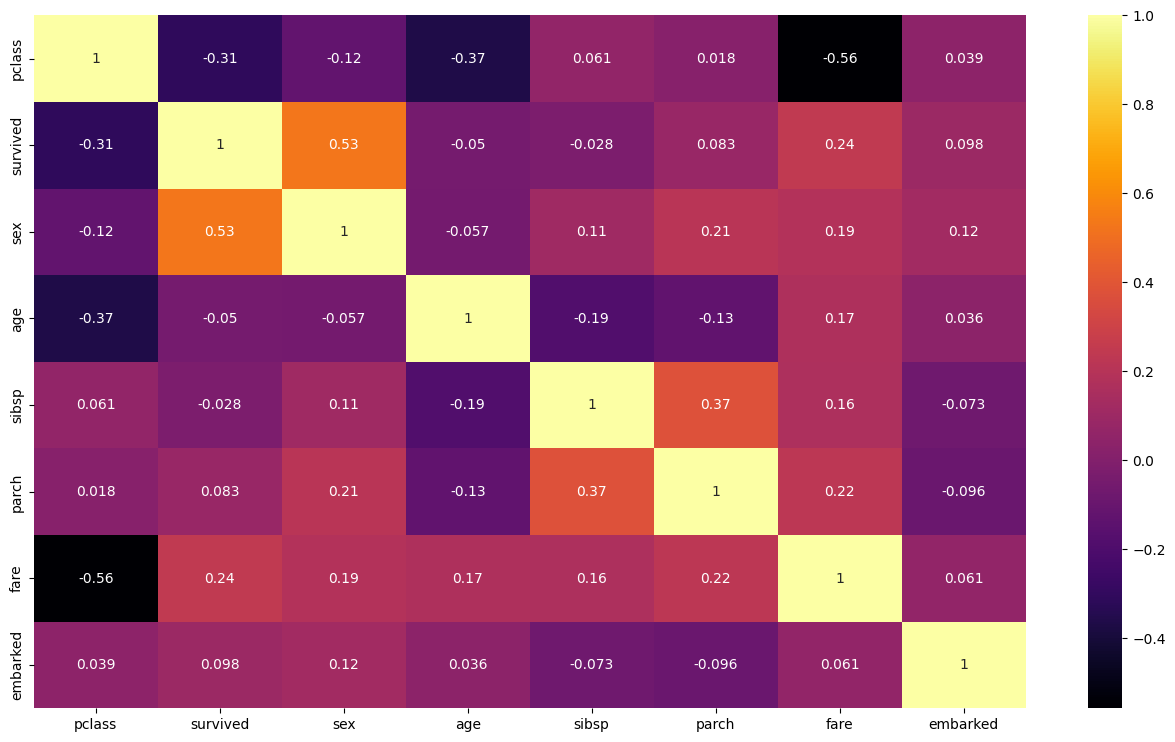

In [142]:
plt.figure(figsize =(16,9))
sns.heatmap(df.corr(), annot = True, cmap = 'inferno')
plt.show()

# Model Building

In [143]:
#importing Library
from sklearn.model_selection import train_test_split

In [144]:
df_train ,df_test = train_test_split(df,test_size=0.20, random_state=121)

In [145]:
df.columns

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [146]:
df_train_x = df_train.iloc[:,[0,2,3,4,5,6]] # All columns except the first one as features
df_train_y = df_train.loc[:,'survived']  # The first column as target variable

df_test_x = df_test.iloc[:,[0,2,3,4,5,6]]
df_test_y = df_test.loc[:,'survived']  # The first column as target variable

## Logestic Regression

In [147]:
#importing Library

from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression    

In [148]:
logistic = LogisticRegression()
logistic.fit(df_train_x,df_train_y) 

LogisticRegression()

In [149]:
pred_test_logistic = logistic.predict(df_test_x)
confusion_matrix(df_test_y,pred_test_logistic)

array([[138,  28],
       [ 33,  63]], dtype=int64)

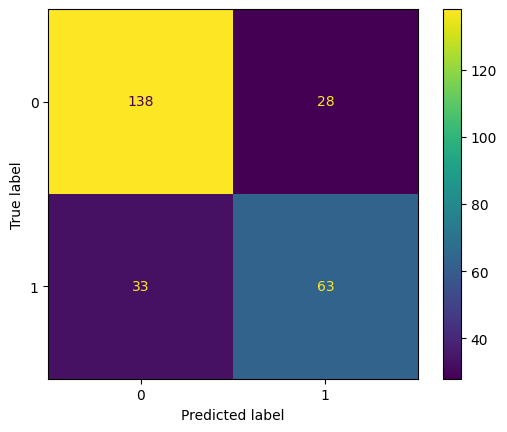

In [150]:
from sklearn.metrics import ConfusionMatrixDisplay
c_matrix=ConfusionMatrixDisplay(confusion_matrix(df_test_y, pred_test_logistic))
c_matrix.plot(cmap = plt.cm.viridis)
plt.show()

In [151]:
Accuarcy_log = accuracy_score(df_test_y,pred_test_logistic)
print(classification_report(df_test_y,pred_test_logistic))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       166
           1       0.69      0.66      0.67        96

    accuracy                           0.77       262
   macro avg       0.75      0.74      0.75       262
weighted avg       0.76      0.77      0.77       262



In [152]:
pred_test_proba_logistic = logistic.predict_proba(df_test_x)[:,1]

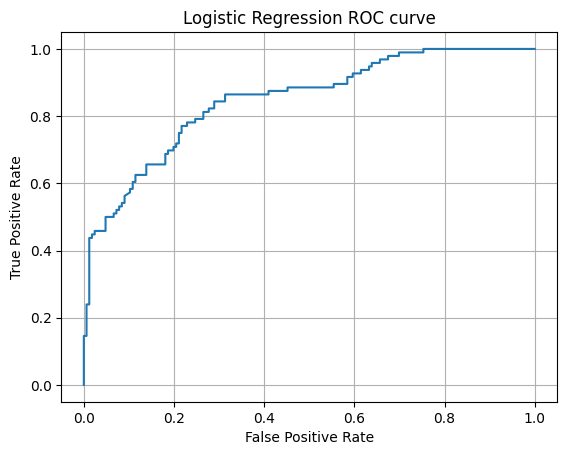

In [153]:
# Fpr vs Tpr curve plot

fpr, tpr, _ = roc_curve(df_test_y, pred_test_proba_logistic)
plt.title('Logistic Regression ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.grid()
plt.show()

In [154]:
score_log = cross_val_score(logistic, df_train_x, df_train_y, cv= 8)
score_log* 100

array([74.04580153, 77.86259542, 80.15267176, 80.15267176, 77.09923664,
       77.86259542, 83.20610687, 80.76923077])

In [155]:
l1 = score_log.mean()*100
print(l1)

78.89386376981797


## Decision Tree 

In [156]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier()

dec.fit(df_train_x,df_train_y)

DecisionTreeClassifier()

In [157]:
pred_test_tree = dec.predict(df_test_x)
confusion_matrix(df_test_y,pred_test_tree)

array([[128,  38],
       [ 26,  70]], dtype=int64)

In [158]:
Accuarcy_dec = accuracy_score(df_test_y,pred_test_tree)

print(classification_report(df_test_y,pred_test_tree))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       166
           1       0.65      0.73      0.69        96

    accuracy                           0.76       262
   macro avg       0.74      0.75      0.74       262
weighted avg       0.76      0.76      0.76       262



## Random Forest

In [159]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier()

random.fit(df_train_x,df_train_y)

RandomForestClassifier()

In [160]:
pred_test_random = random.predict(df_test_x)
confusion_matrix(df_test_y, pred_test_random)

array([[133,  33],
       [ 26,  70]], dtype=int64)

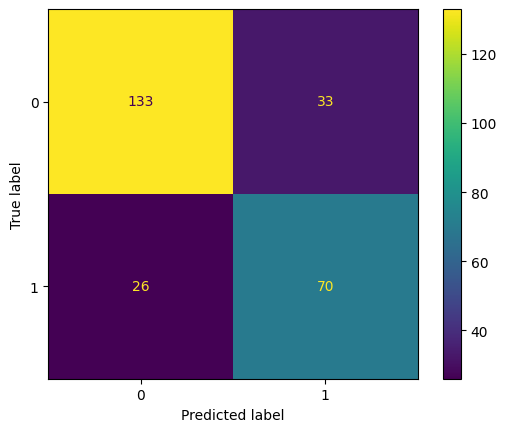

In [161]:
c_matrix_decision = ConfusionMatrixDisplay(confusion_matrix(df_test_y, pred_test_random))
c_matrix_decision.plot(cmap = plt.cm.viridis)
plt.show()

In [162]:
acc_crf = accuracy_score(df_test_y, pred_test_random)
print(classification_report(df_test_y , pred_test_random))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       166
           1       0.68      0.73      0.70        96

    accuracy                           0.77       262
   macro avg       0.76      0.77      0.76       262
weighted avg       0.78      0.77      0.78       262



# Doing Hyper Parameter Tuning on RF

In [163]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter space for Random Forest
search_rf = {
    "n_estimators": [300, 400, 500],    # Number of trees in the forest
    "max_depth": range(40, 50),               # Maximum depth of the trees (up to but not including 21)
    "min_samples_split": range(2, 10)        # Minimum number of samples required to be at a leaf node
}

# Initialize Random Forest model
rf = RandomForestRegressor()

# Initialize RandomizedSearchCV with parameter distributions
random_search_rf = RandomizedSearchCV(rf, param_distributions=search_rf, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV to the training data
random_search_rf.fit(df_train_x, df_train_y)

# Get the best hyperparameters
best_params_rf = random_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)

Best Hyperparameters for Random Forest: {'n_estimators': 500, 'min_samples_split': 9, 'max_depth': 45}


In [164]:
'''

The Best Hyperparameters Are:

n_estimators     : 300
min_samples_split: 9
max_depth        : 43

'''

'\n\nThe Best Hyperparameters Are:\n\nn_estimators     : 300\nmin_samples_split: 9\nmax_depth        : 43\n\n'

In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Define the RandomForestClassifier with the desired parameters
new_rf = RandomForestClassifier(n_estimators=300, min_samples_split=9, max_depth=43)

# Fit the model
new_rf.fit(df_train_x,df_train_y)

# Evaluate the Random Forest model
pred_new_rf = random.predict(df_test_x)

# Print the confusion matrix and classification report
print(confusion_matrix(df_test_y, pred_new_rf))            
print(classification_report(df_test_y, pred_new_rf))

[[133  33]
 [ 26  70]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       166
           1       0.68      0.73      0.70        96

    accuracy                           0.77       262
   macro avg       0.76      0.77      0.76       262
weighted avg       0.78      0.77      0.78       262



In [166]:
rf_new_accuracy = accuracy_score(df_test_y, pred_new_rf)
print("Random Forest Accuracy = ",rf_new_accuracy)

Random Forest Accuracy =  0.7748091603053435


# Comparing Random Forest Accuracy before and after HPT  

In [167]:
print("Before HPT Accuracy = ", acc_crf)
print("After  HPT Accuracy = ", rf_new_accuracy)

Before HPT Accuracy =  0.7748091603053435
After  HPT Accuracy =  0.7748091603053435


In [168]:
#Accuarcy has Same after Hyper Parameter Tuning

## Comparing all Results

In [169]:
print("Logestic Regression Accuracy = ", Accuarcy_log)
print("Decision Tree Accuracy       = ", Accuarcy_dec)
print("Random Forest Accuracy       = ", acc_crf)
print("Random Forest HPT Accuracy   = ", rf_new_accuracy)

Logestic Regression Accuracy =  0.767175572519084
Decision Tree Accuracy       =  0.7557251908396947
Random Forest Accuracy       =  0.7748091603053435
Random Forest HPT Accuracy   =  0.7748091603053435


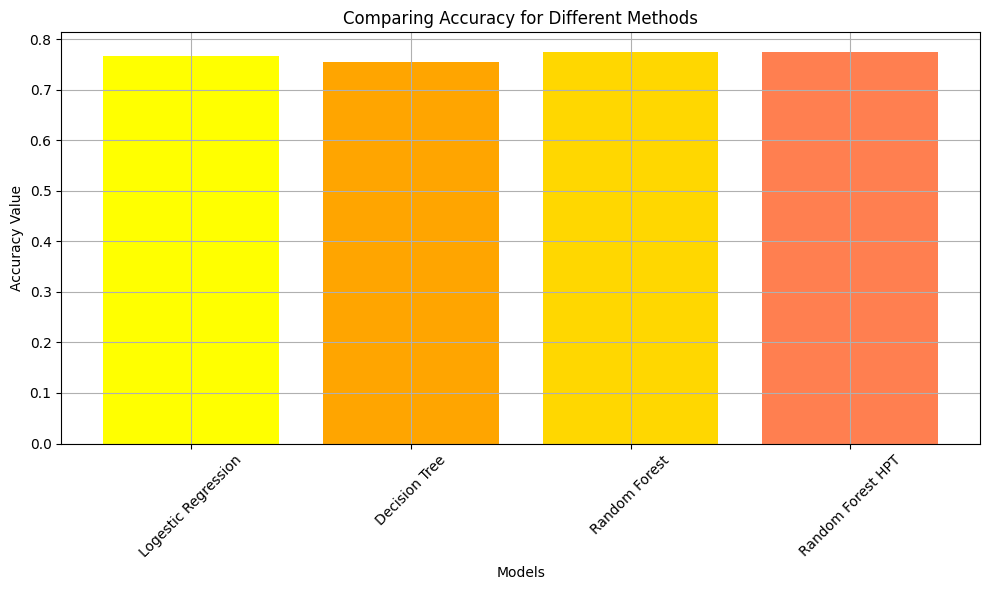

In [170]:
# MSE values for each method on test data
methods     = ['Logestic Regression', 'Decision Tree', 'Random Forest', 'Random Forest HPT']
mse_values = [Accuarcy_log,Accuarcy_dec, acc_crf, rf_new_accuracy]

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(methods, mse_values, color=['yellow', 'orange', 'gold', 'coral'])

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy Value')
plt.title('Comparing Accuracy for Different Methods')
plt.xticks(rotation=45)
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()

In [171]:
'''

After experimenting with various algorithms, including Decision Tree and Random Forest, we can conclude that 
the Random Forest model, delivered the best results for predicting Titanic survival. 

This model showed superior accuracy and performance across several evaluation metrics compared to others.

'''

'\n\nAfter experimenting with various algorithms, including Decision Tree and Random Forest, we can conclude that \nthe Random Forest model, delivered the best results for predicting Titanic survival. \n\nThis model showed superior accuracy and performance across several evaluation metrics compared to others.\n\n'